In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000328_08_03_180.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000223_09_02_146.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000229_03_04_202.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_01_01_104.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_12_01_075.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000143_04_02_153.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/002276_05_03_078.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000020_03_01_166.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000054_03_01_025.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_04_01_242.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_170.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_195.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_03_02_166.png
/kaggle/inpu

In [2]:
%config Completer.use_jedi = False
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

In [3]:
directory = '../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
cases = ['Bengin cases', 'Malignant cases', 'Normal cases']

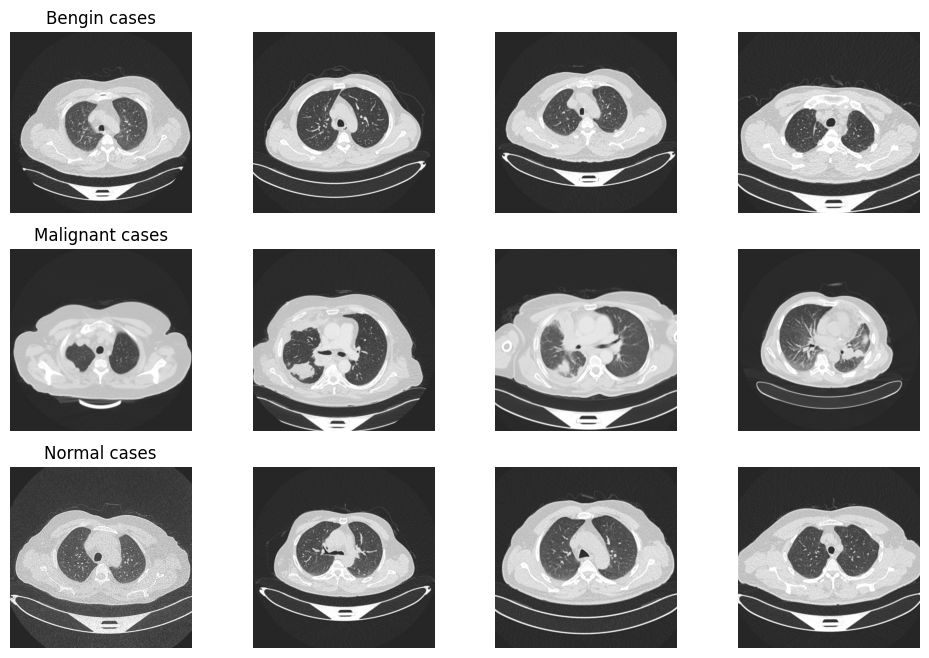

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for index, case in enumerate(cases):
    img_list = os.listdir(os.path.join(directory, case))
    for i in range(4):
        img = cv2.imread(os.path.join(directory, case, img_list[i]))
        ax[index, i].imshow(img)
        ax[index, i].axis('off')
        if i == 0:
            ax[index, i].set_title(case)

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [6]:
img_width, img_height = 224, 224
batch_size = 50

In [7]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [8]:
training_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])
testing_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(training_data, epochs=5, validation_data=testing_data)

Epoch 1/5
18/18 [==============================] - 40s 2s/step - loss: 1.1094 - accuracy: 0.4567 - val_loss: 0.9575 - val_accuracy: 0.5114
Epoch 2/5
18/18 [==============================] - 35s 2s/step - loss: 0.9058 - accuracy: 0.5809 - val_loss: 0.9244 - val_accuracy: 0.5845
Epoch 3/5
18/18 [==============================] - 36s 2s/step - loss: 0.7956 - accuracy: 0.6629 - val_loss: 0.9849 - val_accuracy: 0.5982
Epoch 4/5
18/18 [==============================] - 36s 2s/step - loss: 0.7794 - accuracy: 0.6788 - val_loss: 1.0971 - val_accuracy: 0.5890
Epoch 5/5
18/18 [==============================] - 35s 2s/step - loss: 0.7181 - accuracy: 0.7187 - val_loss: 0.9596 - val_accuracy: 0.6256


1/1 [==============================] - 0s 113ms/step
Normal
1/1 [==============================] - 0s 33ms/step
Normal
1/1 [==============================] - 0s 32ms/step
Malignant


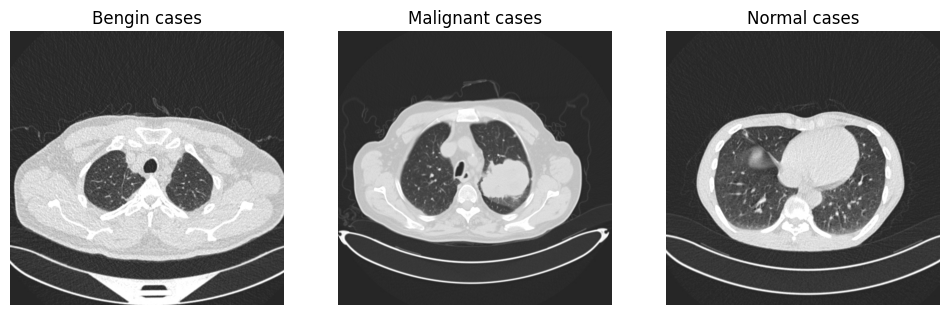

In [13]:
from tensorflow.keras.preprocessing import image

prediction_img = ['/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (117).jpg',
                   '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (387).jpg', 
                  '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (327).jpg']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

for i in range(3):
    img = cv2.imread(prediction_img[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(cases[i])
            

for i in prediction_img:
    img = image.load_img(i, target_size=(img_width, img_height))
    img_arr = image.img_to_array(img)
    img_arr= np.expand_dims(img_arr, axis=0)
    img_arr= img_arr/255
    predictions = model.predict(img_arr)
    predicted_class = np.argmax(predictions)
    if predicted_class == 0:
        print('Benign')
    elif predicted_class == 1:
        print('Malignant')
    else:
        print('Normal')